In [54]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [35]:
hpi_base = open("hpi_base.pkl","rb")
hpi = pd.read_pickle(hpi_base)
hpi = pd.DataFrame(hpi)
hpi.head(200)

,period_start,period_end,trans_period,coef,price_index,census_zcta5_geoid,census_cbsa_geoid
0,2007-01-01,2007-01-31,1.0,0.000000,100.000000,00000,11460
1,2007-02-01,2007-02-28,2.0,-0.018513,98.165768,00000,11460
2,2007-03-01,2007-03-31,3.0,-0.016101,98.402746,00000,11460
3,2007-04-01,2007-04-30,4.0,-0.014683,98.542442,00000,11460
4,2007-05-01,2007-05-31,5.0,-0.049284,95.191042,00000,11460
5,2007-06-01,2007-06-30,6.0,-0.056957,97.460913,00000,11460
6,2007-07-01,2007-07-31,7.0,-0.080070,96.178445,00000,11460
7,2007-08-01,2007-08-31,8.0,-0.090466,95.042580,00000,11460
8,2007-09-01,2007-09-30,9.0,-0.092902,93.830170,00000,11460
9,2007-10-01,2007-10-31,10.0,-0.076260,92.849345,00000,11460


In [13]:
hpi.shape
# 2 million observations

(2289507, 7)

In [36]:
len(hpi['census_cbsa_geoid'].unique()) # 91 census tracts
len(hpi['census_zcta5_geoid'].unique()) # 11189 zip codes
len(hpi['trans_period'].unique()) # 200 periods, monthly from 2007 to present

11189

In [41]:
rpi_index = open("rpi_index.pkl","rb")
rpi = pd.read_pickle(rpi_index)
rpi = pd.DataFrame(rpi)
rpi.head(200)

,date,rental_index,census_cbsa_geoid,census_zcta5_geoid
0,2010-02-01,100.000000,17140,00000
1,2010-03-01,74.931176,17140,00000
2,2010-04-01,79.105472,17140,00000
3,2010-05-01,70.164398,17140,00000
4,2010-06-01,54.594201,17140,00000
5,2010-07-01,80.757459,17140,00000
6,2010-08-01,78.479249,17140,00000
7,2010-09-01,79.804032,17140,00000
8,2010-10-01,78.491062,17140,00000
9,2010-11-01,76.840681,17140,00000


In [14]:
rpi.shape
# 1.6 million observations

(1684308, 4)

In [40]:
len(rpi['census_cbsa_geoid'].unique()) # 87 census tracts
len(rpi['census_zcta5_geoid'].unique()) # 11241 zip codes
len(rpi['date'].unique()) # 164 dates, monthly from 2010 to present

164

In [22]:
migration_atl = pd.read_csv('area_migration_atlanta_tract.csv', index_col = 0)
migration_atl.head()

,area,us_state_id,us_state,us_cbsa_id,us_cbsa,us_county_id,us_county,us_tract_id,us_tract,observation_start_date,observation_end_date,student_population_fraction,population,netflow_estimated,inflow_estimated,outflow_estimated,netflow_estimated_normalized,inflow_estimated_normalized,outflow_estimated_normalized,cumulative_netflow_estimated,median_income_inflow,median_income,median_income_difference,median_age_inflow,median_age,median_age_difference,confidence_score
location_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
13121005501,1192738,13,Georgia,12060,"Atlanta-Sandy Springs-Alpharetta, GA Metro Area",13121,"Fulton County, GA",13121005501,13121005501,2023-06-01,2023-06-30,0.0877,3045,0,13,13,0,12,12,-73,46088.5742,37342,8746.5732,23.3552,30.6,-7.2448,1
13117130413,5159717,13,Georgia,12060,"Atlanta-Sandy Springs-Alpharetta, GA Metro Area",13117,"Forsyth County, GA",13117130413,13117130413,2023-06-01,2023-06-30,0.0217,2725,5,25,20,5,23,19,315,87631.4922,47383,40248.4922,28.1005,44.9,-16.7995,1
13063040523,2666441,13,Georgia,12060,"Atlanta-Sandy Springs-Alpharetta, GA Metro Area",13063,"Clayton County, GA",13063040523,13063040523,2023-06-01,2023-06-30,0.1003,2821,-1,15,16,-1,14,15,-121,31598.7207,43214,-11615.2783,21.2600,33.3,-12.0400,1
13089022900,3903186,13,Georgia,12060,"Atlanta-Sandy Springs-Alpharetta, GA Metro Area",13089,"DeKalb County, GA",13089022900,13089022900,2023-06-01,2023-06-30,0.0225,4044,1,43,42,1,40,39,133,57696.6094,89792,-32095.3887,29.8097,44.4,-14.5903,1
13121007709,3497343,13,Georgia,12060,"Atlanta-Sandy Springs-Alpharetta, GA Metro Area",13121,"Fulton County, GA",13121007709,13121007709,2023-06-01,2023-06-30,0.1179,4921,-2,21,23,-2,20,21,-8,26437.3164,86637,-60199.6836,20.9190,34.6,-13.6810,1


<Axes: xlabel='netflow_estimated', ylabel='netflow_estimated_normalized'>

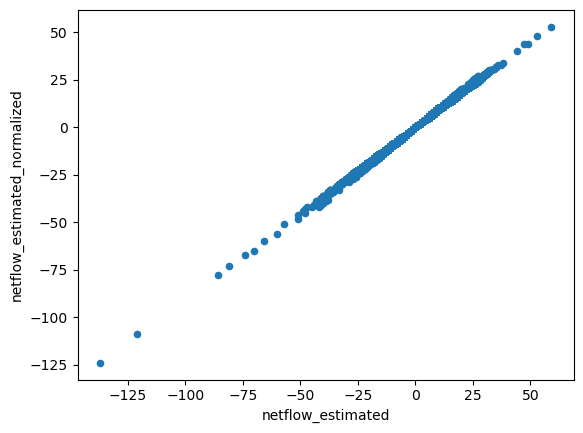

In [47]:
# netflow is net in/out
# what is netflow normalized?
migration_atl.plot.scatter('netflow_estimated', 'netflow_estimated_normalized') # x, y

In [48]:
migration_atl['observation_start_date'].unique() # from Dec 2018 to Jun 2023

array(['2023-06-01', '2023-05-01', '2023-04-01', '2023-03-01',
       '2023-02-01', '2023-01-01', '2022-12-01', '2022-11-01',
       '2022-10-01', '2022-09-01', '2022-08-01', '2022-07-01',
       '2022-06-01', '2022-05-01', '2022-04-01', '2022-03-01',
       '2022-02-01', '2022-01-01', '2021-12-01', '2021-11-01',
       '2021-10-01', '2021-09-01', '2021-08-01', '2021-07-01',
       '2021-06-01', '2021-05-01', '2021-04-01', '2021-03-01',
       '2021-02-01', '2021-01-01', '2020-12-01', '2020-11-01',
       '2020-10-01', '2020-09-01', '2020-08-01', '2020-07-01',
       '2020-06-01', '2020-05-01', '2020-04-01', '2020-03-01',
       '2020-02-01', '2020-01-01', '2019-12-01', '2019-11-01',
       '2019-10-01', '2019-09-01', '2019-08-01', '2019-07-01',
       '2019-06-01', '2019-05-01', '2019-04-01', '2019-03-01',
       '2019-02-01', '2019-01-01', '2018-12-01'], dtype=object)

In [58]:
migration_atl['observation_start_date'] = pd.to_datetime(migration_atl['observation_start_date'],
                                                         format = '%Y-%m-%d')

<Axes: xlabel='observation_start_date', ylabel='cumulative_netflow_estimated'>

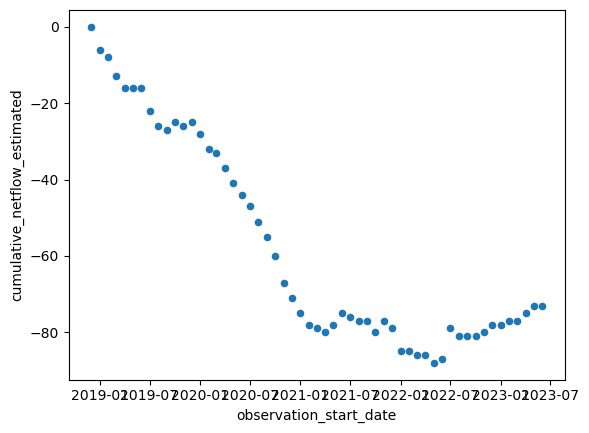

In [59]:
# sample cumulative netflow
migration_atl[migration_atl['us_tract_id'] == 13121005501]\
.plot.scatter('observation_start_date', 'cumulative_netflow_estimated')

<Axes: >

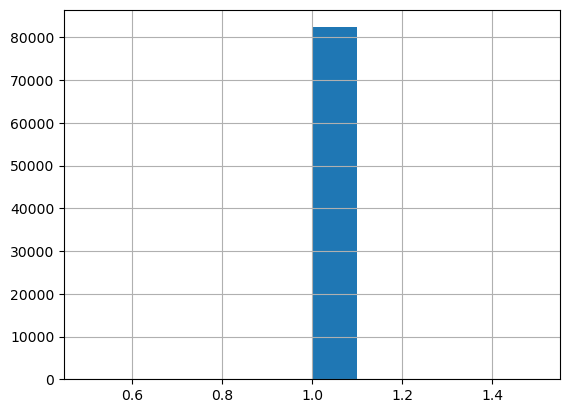

In [52]:
migration_atl['confidence_score'].hist()
# what is the confidence score?

In [23]:
migration_ga = pd.read_csv('area_migration_ga_zip.csv', index_col = 0)
migration_ga.head()

,area,us_state_id,us_state,us_zip_id,us_zip,observation_start_date,observation_end_date,student_population_fraction,population,netflow_estimated,inflow_estimated,outflow_estimated,netflow_estimated_normalized,inflow_estimated_normalized,outflow_estimated_normalized,cumulative_netflow_estimated,median_income_inflow,median_income,median_income_difference,median_age_inflow,median_age,median_age_difference,confidence_score
location_id,,,,,,,,,,,,,,,,,,,,,,,
31018,238943649,13,Georgia,31018,31018,2023-06-01,2023-06-30,0.0262,3005,0,0,0,0,0,0,-29,0.0000,34611,0.0000,0.0000,38.7,0.0000,1
30011,69386929,13,Georgia,30011,30011,2023-06-01,2023-06-30,0.0395,16943,52,157,105,49,147,98,1673,69231.7891,73195,-3963.2146,31.4163,33.6,-2.1837,1
39859,153473124,13,Georgia,39859,39859,2023-06-01,2023-06-30,0.0170,1325,0,0,0,0,0,0,13,0.0000,31944,0.0000,0.0000,40.1,0.0000,1
30165,440778795,13,Georgia,30165,30165,2023-06-01,2023-06-30,0.0414,41854,-25,127,152,-23,119,142,-2255,45105.1797,55448,-10342.8203,32.5354,37.2,-4.6646,1
31798,205162809,13,Georgia,31798,31798,2023-06-01,2023-06-30,0.0157,1091,0,0,0,0,0,0,-11,0.0000,46111,0.0000,0.0000,34.0,0.0000,1


In [24]:
migration_ga.columns

Index(['area', 'us_state_id', 'us_state', 'us_zip_id', 'us_zip',
       'observation_start_date', 'observation_end_date',
       'student_population_fraction', 'population', 'netflow_estimated',
       'inflow_estimated', 'outflow_estimated', 'netflow_estimated_normalized',
       'inflow_estimated_normalized', 'outflow_estimated_normalized',
       'cumulative_netflow_estimated', 'median_income_inflow', 'median_income',
       'median_income_difference', 'median_age_inflow', 'median_age',
       'median_age_difference', 'confidence_score'],
      dtype='object')

In [25]:
migration_atl.columns
# same columns, on zip or cbsa level

Index(['area', 'us_state_id', 'us_state', 'us_cbsa_id', 'us_cbsa',
       'us_county_id', 'us_county', 'us_tract_id', 'us_tract',
       'observation_start_date', 'observation_end_date',
       'student_population_fraction', 'population', 'netflow_estimated',
       'inflow_estimated', 'outflow_estimated', 'netflow_estimated_normalized',
       'inflow_estimated_normalized', 'outflow_estimated_normalized',
       'cumulative_netflow_estimated', 'median_income_inflow', 'median_income',
       'median_income_difference', 'median_age_inflow', 'median_age',
       'median_age_difference', 'confidence_score'],
      dtype='object')

In [60]:
ft_atl = pd.read_csv('atlanta_foot_traffic_v2_quarterly_202302-from-2020-10-01.csv', index_col = 0)
ft_atl.head(30)

,brand_id,brand,naics_id,naics,us_state_id,us_state,us_county_id,us_county,us_census_tract_id,us_census_tract,us_census_block_group_id,us_census_block_group,us_metro_area_id,us_metro_area,street_address,zip,h3,observation_start_date,observation_end_date,person_count,person_count_p50,people_fraction_age_18_29,people_fraction_age_30_39,people_fraction_age_40_49,people_fraction_age_50_59,people_fraction_age_60_69,people_fraction_age_70_79,people_fraction_age_80_and_above,people_fraction_education_high_school,people_fraction_education_college_without_degree,people_fraction_education_associate,people_fraction_education_bachelor,people_fraction_education_master_and_above,people_fraction_gender_female,people_fraction_gender_male,people_fraction_income_25k_and_less,people_fraction_income_25k_50k,people_fraction_income_50k_75k,people_fraction_income_75k_100k,people_fraction_income_100k_125k,people_fraction_income_125k_and_above,people_fraction_race_amerindian,people_fraction_race_asian,people_fraction_race_black,people_fraction_race_white,people_fraction_race_other,people_fraction_race_two_or_more,return_rate,visit_length_p25,visit_length_p50,visit_length_p75,capture_rate_150m_p25,capture_rate_150m_p50,capture_rate_150m_p75,capture_rate_300m_p25,capture_rate_300m_p50,capture_rate_300m_p75
location_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
e64dd24c-86cd-48cd-aa48-97369f8c0cec,ffe66a9b-6b7d-4e9c-b814-4d7f5a738167,Chico's,448120,Women's Clothing Stores,13,Georgia,13067,"Cobb County, GA",13067030336,"Census Tract 303.36, Cobb County, Georgia",130670303361,"Block Group 1, Census Tract 303.36, Cobb Count...",12060,"Atlanta-Sandy Springs-Alpharetta, GA",4475 Roswell Rd,30062,8a44c1355acffff,2023-04-01,2023-06-30,20081,184,0.1422,0.1487,0.2084,0.2109,0.1674,0.0839,0.0386,0.1035,0.1431,0.0560,0.3403,0.1625,0.5215,0.4785,0.0841,0.1067,0.1618,0.1247,0.1095,0.4133,0.0016,0.0707,0.0938,0.7381,0.0035,0.0203,0.2500,25,61,132,0.052,0.070,0.085,0.037,0.048,0.061
e0f063dc-9ce9-4f5c-824c-ed22b2e01d77,ff9a9c68-52a5-44ba-896d-4a01e3b4395e,Kroger,445110,Supermarkets and Other Grocery (except Conveni...,13,Georgia,13135,"Gwinnett County, GA",13135050539,"Census Tract 505.39, Gwinnett County, Georgia",131350505391,"Block Group 1, Census Tract 505.39, Gwinnett C...",12060,"Atlanta-Sandy Springs-Alpharetta, GA",950 Herrington Rd,30044,8a44c13936affff,2023-04-01,2023-06-30,600386,6227,0.2590,0.2311,0.2261,0.1376,0.0937,0.0363,0.0163,0.2092,0.1731,0.0694,0.1469,0.0540,0.5226,0.4774,0.1862,0.2464,0.2765,0.1271,0.0704,0.0934,0.0022,0.1323,0.2932,0.2073,0.0085,0.0155,0.3367,9,19,36,0.737,0.776,0.810,0.424,0.467,0.505
e2059c9a-a7ed-4837-a508-b07d8ad0e3e3,ffc83174-6d18-4062-95db-e3c01f52e554,Target,452319,All Other General Merchandise Stores,13,Georgia,13097,"Douglas County, GA",13097080603,"Census Tract 806.03, Douglas County, Georgia",130970806031,"Block Group 1, Census Tract 806.03, Douglas Co...",12060,"Atlanta-Sandy Springs-Alpharetta, GA",2950 Chapel Hill Rd,30135,8a44c1b4b827fff,2023-04-01,2023-06-30,335473,3446,0.1980,0.1821,0.2101,0.1850,0.1308,0.0672,0.0267,0.2152,0.2016,0.0678,0.1557,0.0724,0.5331,0.4668,0.1766,0.1741,0.2478,0.1430,0.0969,0.1612,0.0012,0.0172,0.4189,0.4654,0.0020,0.0151,0.2167,15,26,45,0.459,0.492,0.518,0.180,0.196,0.214
f01b1a1f-5f58-461b-b2ff-e43f830e993b,fcd8c09f-8294-41fa-82f6-7a5dd38bba9a,The Shade Store,444130,Hardware Stores,13,Georgia,13121,"Fulton County, GA",13121009300,"Census Tract 93, Fulton County, Georgia",131210093002,"Block Group 2, Census Tract 93, Fulton County,...",12060,"Atlanta-Sandy Springs-Alpharetta, GA","351 Peachtree Hills Avenue, N.E.",30305,8a44c1324307fff,2023-04-01,2023-06-30,53465,732,0.1969,0.1892,0.1914,0.1777,0.1487,0.0657,0.0304,0.1189,0.1406,0.0545,0.2937,0.1391,0.5114,0.4886,0.1378,0.1283,0.1911,0.1117,0.0815,0.3496,0.0012,0.0428,0.1776,0.6843,0.0016,0.0188,0.2533,43,138,406,0.330,0.487,0.598,0.073,0.135,0.191
14fd1f25-b8ef-4157-a784-081864397aae,fff707ad-9e93-4294-a506-f5fb448204b8,Ch

In [65]:
len(ft_atl['brand'].unique()) # 668 stores

668

In [66]:
ft_atl.groupby('brand')['observation_start_date'].count().sort_values()
# from 1 to 4000 observations for each brand

brand
Go! Retail Group                   1
Aaron Brothers                     2
Lakeshore Learning Materials       4
AG Jeans                           4
DIESEL                             5
                                ... 
CITGO Petroleum                 2194
BP                              3059
Dollar General                  3211
Shell                           3596
Chevron                         4841
Name: observation_start_date, Length: 668, dtype: int64

In [69]:
ft_atl.groupby(['brand', 'street_address'])['observation_start_date'].count().sort_values()
# for individual stores, between 1 and 32 observations

brand                      street_address                       
Goodwill                   3871 Highway 138 SE                       1
Chevron                    5590 Hwy 81 South                         1
Spirit Halloween           1910 Highway 20 SE Ste 300                1
Hobby Lobby                1825 Rockbridge Rd., Suite 9A             1
Spirit Halloween           3655 Roswell Rd                           1
                                                                    ..
Victoria's Secret          3333 Buford Drive                        22
BCBGeneration              3393 Peachtree Road NE                   22
Carter's                   800 Highway 400 South                    22
American Eagle Outfitters  3333 Buford Drive                        28
EyeSouth Partners          1100 Johnson Ferry Rd., NE Building 1    32
Name: observation_start_date, Length: 9315, dtype: int64

In [70]:
ft_atl[(ft_atl['brand'] == 'American Eagle Outfitters') & 
       (ft_atl['street_address'] == '3333 Buford Drive')]
# why is each observation period listed 3 times?

,brand_id,brand,naics_id,naics,us_state_id,us_state,us_county_id,us_county,us_census_tract_id,us_census_tract,us_census_block_group_id,us_census_block_group,us_metro_area_id,us_metro_area,street_address,zip,h3,observation_start_date,observation_end_date,person_count,person_count_p50,people_fraction_age_18_29,people_fraction_age_30_39,people_fraction_age_40_49,people_fraction_age_50_59,people_fraction_age_60_69,people_fraction_age_70_79,people_fraction_age_80_and_above,people_fraction_education_high_school,people_fraction_education_college_without_degree,people_fraction_education_associate,people_fraction_education_bachelor,people_fraction_education_master_and_above,people_fraction_gender_female,people_fraction_gender_male,people_fraction_income_25k_and_less,people_fraction_income_25k_50k,people_fraction_income_50k_75k,people_fraction_income_75k_100k,people_fraction_income_100k_125k,people_fraction_income_125k_and_above,people_fraction_race_amerindian,people_fraction_race_asian,people_fraction_race_black,people_fraction_race_white,people_fraction_race_other,people_fraction_race_two_or_more,return_rate,visit_length_p25,visit_length_p50,visit_length_p75,capture_rate_150m_p25,capture_rate_150m_p50,capture_rate_150m_p75,capture_rate_300m_p25,capture_rate_300m_p50,capture_rate_300m_p75
location_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bac2060c-d35e-4c67-9cfa-64cb5dd71119,fffee723-828d-44c4-9841-587ca3c945b0,American Eagle Outfitters,448140,Family Clothing Stores,13,Georgia,13135,"Gwinnett County, GA",13135050606,"Census Tract 506.06, Gwinnett County, Georgia",131350506063,"Block Group 3, Census Tract 506.06, Gwinnett C...",12060,"Atlanta-Sandy Springs-Alpharetta, GA",3333 Buford Drive,30519,8a44c16639b7fff,2023-04-01,2023-06-30,72118,699,0.2174,0.1780,0.2081,0.1823,0.1239,0.0620,0.0274,0.1865,0.1815,0.0758,0.1799,0.0713,0.5196,0.4796,0.1573,0.1759,0.2372,0.1408,0.0991,0.1883,0.0020,0.0713,0.2020,0.5426,0.0035,0.0201,0.2167,30,49,80,0.061,0.075,0.085,0.028,0.033,0.038
a043ed56-e6c3-4aa5-8291-4e2d16b72cf4,fffee723-828d-44c4-9841-587ca3c945b0,American Eagle Outfitters,448140,Family Clothing Stores,13,Georgia,13135,"Gwinnett County, GA",13135050606,"Census Tract 506.06, Gwinnett County, Georgia",131350506063,"Block Group 3, Census Tract 506.06, Gwinnett C...",12060,"Atlanta-Sandy Springs-Alpharetta, GA",3333 Buford Drive,30519,8a44c16639b7fff,2023-04-01,2023-06-30,72632,679,0.2149,0.1778,0.2087,0.1829,0.1245,0.0627,0.0277,0.1863,0.1816,0.0760,0.1797,0.0715,0.5200,0.4792,0.1572,0.1761,0.2373,0.1410,0.0986,0.1884,0.0021,0.0733,0.1994,0.5423,0.0034,0.0201,0.2100,30,49,80,0.063,0.072,0.084,0.028,0.032,0.037
8c8cc44c-8dce-482a-b562-73dd64b9def1,fffee723-828d-44c4-9841-587ca3c945b0,American Eagle Outfitters,448140,Family Clothing Stores,13,Georgia,13135,"Gwinnett County, GA",13135050606,"Census Tract 506.06, Gwinnett County, Georgia",131350506063,"Block Group 3, Census Tract 506.06, Gwinnett C...",12060,"Atlanta-Sandy Springs-Alpharetta, GA",3333 Buford Drive,30519,8a44c16639a7fff,2023-04-01,2023-06-30,13657,132,0.2129,0.1769,0.2021,0.1806,0.1328,0.0678,0.0270,0.1782,0.1832,0.0807,0.1979,0.0773,0.5212,0.4788,0.1478,0.1652,0.2397,0.1536,0.0987,0.1925,0.0019,0.0757,0.2134,0.5478,0.0026,0.0234,0.4133,30,49,88,0.017,0.023,0.030,0.007,0.010,0.013
8c8cc44c-8dce-482a-b562-73dd64b9def1,fffee723-828d-44c4-9841-587ca3c945b0,American Eagle Outfitters,448140,Family Clothing Stores,13,Georgia,13135,"Gwinnett County, GA",13135050606,"Census Tract 506.06, Gwinnett County, Georgia",131350506063,"Block Group 3, Census Tract 506.06, Gwinnett C...",12060,"Atlanta-Sandy Springs-Alpharetta, GA",3333 Buford Drive,30519,8a44c16639a7fff,2023-01-01,2023-03-31,18838,190,0.2096,0.1783,0.2163,0.1802,0.1271,0.0627,0.0258,0.1768,0.1757,0.0777,0.1975,0.0767,0.5159,0.4841,0.1427,0.1629,0.2315,0.1506,0.1089,0.2033,0.0014,0.0796,0.1856,0.5443,0.0036,0.0235,0.1400,29,47,79,0.009,0.015,0.022,0.003,0.006,0.009
a043ed56-e6c3-4aa5-8291-4e2d16b72cf4,fffee723-828d

In [ ]:
# What are...?

# return_rate
# visit_length_p25, p50, p75
# capture_rate_150m_p25 (etc)

In [20]:
cbsa = pd.read_csv('census_cbsa_zip_tract.csv', index_col = 0)
cbsa.head(40)
# lat and lon for cbsa, zcta, tracts

,census_cbsa_geoid,census_cbsa_name,census_cbsa_lsad,census_cbsa_lat,census_cbsa_lon,census_zcta5_geoid,census_zcta5_lat,census_zcta5_lon,census_tract_geoid,census_tract_lat,census_tract_lon
0,NaN,NaN,NaN,NaN,NaN,46534,41.285345,-86.617818,18149953800,41.245562,-86.539415
1,NaN,NaN,NaN,NaN,NaN,46534,41.285345,-86.617818,18149953900,41.223357,-86.626671
2,NaN,NaN,NaN,NaN,NaN,46534,41.285345,-86.617818,18149954000,41.288932,-86.621202
3,NaN,NaN,NaN,NaN,NaN,46534,41.285345,-86.617818,18149953700,41.349693,-86.591977
4,21780.0,"Evansville, IN-KY",M1,38.020070,-87.586166,47660,38.296067,-87.328127,18051050300,38.280515,-87.379887
5,27540.0,"Jasper, IN",M2,38.384156,-87.035954,47660,38.296067,-87.328127,18051050300,38.280515,-87.379887
6,14020.0,"Bloomington, IN",M1,39.241736,-86.671754,47424,39.020048,-86.882428,18055955400,39.031930,-86.932400
7,14020.0,"Bloomington, IN",M1,39.241736,-86.671754,47424,39.020048,-86.882428,18055954800,39.110252,-86.922536
8,14020.0,"Bloomington, IN",M1,39.241736,-86.671754,47424,39.020048,-86.882428,18055954701,38.973253,-86.763794
9,47780.0,"Washington, IN",M2,38.696090,-87.076943,47519,38.590053,-86.983857,18027954502,38.602712,-86.992695
